<a href="https://colab.research.google.com/github/tunatuna123/covid_logistic/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import animation
import pandas as pd
import warnings
import math
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings(action='ignore') 
mpl.rc('axes', unicode_minus=False)

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name() 
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/경기도 하남시_코로나 확진자 누적 현황_20220727.csv', encoding='cp949')
df

,지역,날짜,확진자,누적확진자,데이터기준일
0,하남시,2020-03-17,1,1,2022-07-27
1,하남시,2020-03-18,0,1,2022-07-27
2,하남시,2020-03-19,0,1,2022-07-27
3,하남시,2020-03-20,0,1,2022-07-27
4,하남시,2020-03-21,0,1,2022-07-27
...,...,...,...,...,...
857,하남시,2022-07-22,488,125123,2022-07-27
858,하남시,2022-07-23,437,125560,2022-07-27
859,하남시,2022-07-24,243,125803,2022-07-27
860,하남시,2022-07-25,709,126512,2022-07-27


In [3]:
acc_pos = np.array(df['누적확진자'])
day = np.array(range(len(acc_pos)))

In [4]:
len(day)

862

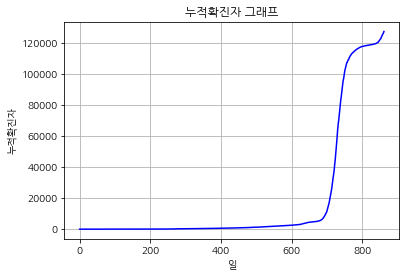

In [5]:
plt.xlabel('일')
plt.ylabel('누적확진자')
plt.title('누적확진자 그래프')
plt.plot(day, acc_pos, c='blue')
plt.grid()
plt.show()

In [7]:
acc_pos = acc_pos/127081
arr = []
for i in tqdm(range(650,750)):
    y = 127081 / (np.e ** (-2.68*(day-i))+1)
    arr.append(np.sum((acc_pos-y)**2))

100%|██████████| 100/100 [00:00<00:00, 5501.45it/s]


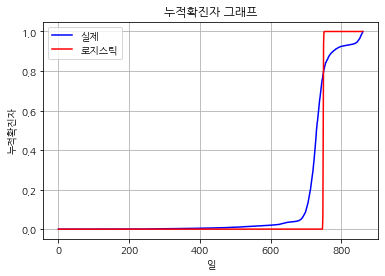

In [8]:
y = 1 / (np.e ** (-2.68*(day-(650+np.array(arr).argmin())))+1)
plt.xlabel('일')
plt.ylabel('누적확진자')
plt.title('누적확진자 그래프')
plt.grid()
plt.plot(day, acc_pos, c='blue', label='실제')
plt.plot(day, y, c='red', label = '로지스틱')
plt.legend()
plt.savefig("covid.jpg", dpi=600)
plt.show()

In [9]:
from google.colab import files
files.download('covid.jpg') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>